In [2]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import pandas as pd

In [3]:
# Upload file from your computer
uploaded = files.upload()

Saving heart_disease.csv to heart_disease.csv


In [7]:
# Load cleaned dataset
df = pd.read_csv("heart_disease.csv")

# Show first 5 rows
print("✅ Dataset Preview:")
print(df.head())

print("\n📊 Dataset Info:")
print(df.info())

# Split features & target
X = df.drop("num", axis=1)
y = df["num"]

✅ Dataset Preview:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal       num  
0  0.017197 -0.696631  1.087338  2.274579 -0.711131  0.660004 -0.764198  
1 -1.821905  1.435481  0.397182  0.649113  2.504881 -0.890238  0.866450  
2 -0.902354  1.435481  1.346147  0.649113  1.432877  1.176752  0.051126  
3  1.637359 -0.696631  2.122573  2.274579 -0.711131 -0.890238 -0.764198  
4  0.980537 -0.696631  0.310912 -0.976352 -0.711131 -0.890238 -0.764198  

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 3

In [9]:
# Convert target into binary classes
y = (df["num"] > 0).astype(int)   # 0 = no disease, 1 = disease present

# Features
X = df.drop("num", axis=1)

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

print("✅ Random Forest trained successfully!")

✅ Random Forest trained successfully!


/tmp/ipython-input-1846570654.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")


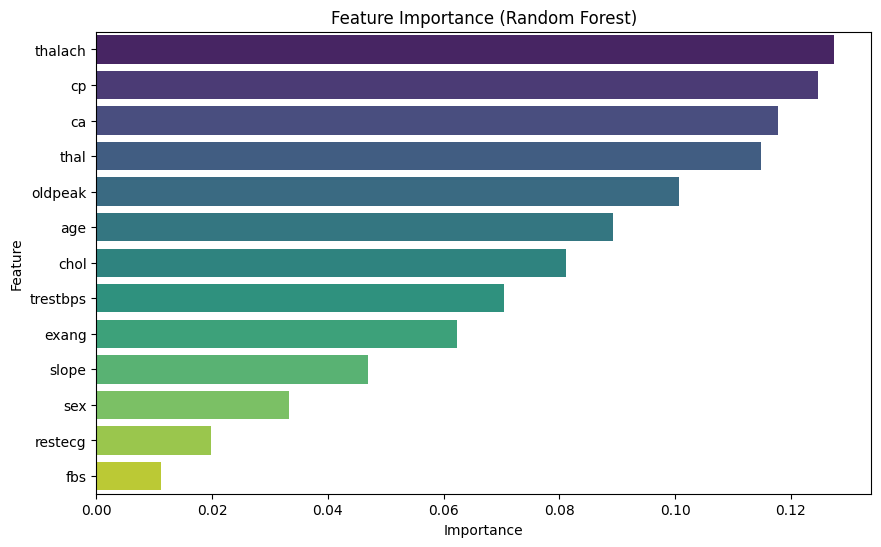

📊 Ranked Features:
      Feature  Importance
7    thalach    0.127532
2         cp    0.124639
11        ca    0.117752
12      thal    0.114876
9    oldpeak    0.100619
0        age    0.089359
4       chol    0.081193
3   trestbps    0.070480
8      exang    0.062352
10     slope    0.047018
1        sex    0.033215
6    restecg    0.019810
5        fbs    0.011155


In [10]:
# Get feature importances
importances = rf.feature_importances_
feat_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

print("📊 Ranked Features:\n", feat_importances)

In [11]:
# Logistic Regression with RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)  # choose top 5 features
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("✅ Selected Features with RFE:", list(selected_features))

✅ Selected Features with RFE: ['cp', 'exang', 'oldpeak', 'ca', 'thal']


In [13]:
# Chi-Square Test (requires non negative values)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_chi2 = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

chi2_selector = SelectKBest(chi2, k=5)  # top 5 features
chi2_selector.fit(X_chi2, y)

chi2_features = X.columns[chi2_selector.get_support()]
print("✅ Significant Features by Chi-Square Test:", list(chi2_features))

✅ Significant Features by Chi-Square Test: ['exang', 'oldpeak', 'slope', 'ca', 'thal']


In [16]:
# Union of RFE + Chi-Square
final_features = list(set(selected_features) | set(chi2_features))
print("🎯 Final Selected Features for Modeling:", final_features)

X_reduced = X[final_features]
print("Reduced dataset: ", X_reduced.head())

🎯 Final Selected Features for Modeling: ['cp', 'oldpeak', 'ca', 'slope', 'exang', 'thal']
Reduced dataset:           cp   oldpeak        ca     slope     exang      thal
0 -2.251775  1.087338 -0.711131  2.274579 -0.696631  0.660004
1  0.877985  0.397182  2.504881  0.649113  1.435481 -0.890238
2  0.877985  1.346147  1.432877  0.649113  1.435481  1.176752
3 -0.165268  2.122573 -0.711131  2.274579 -0.696631 -0.890238
4 -1.208521  0.310912 -0.711131 -0.976352 -0.696631 -0.890238
